### Debugging Outputs

2.<br>
(c) Your cost function should be a number between 2200-2400 <br>
(d) Final tempreture: 3.360K <br>


### The Schwefel function

In [49]:
import numpy as np
import pandas as pd
import numba
import matplotlib.pyplot as plt
numba.warnings.filterwarnings("ignore")
def Schwefel(X):
    dim=len(X)
    return 418.9829*dim-np.sum(X*np.sin(np.sqrt(np.abs(X))),axis=0)

### Visualize a 2d function

In [50]:
def plot_surface(func,x_min=-2,x_max=2,y_min=-2,y_max=2):
    a=np.linspace(x_min,x_max,100)
    b=np.linspace(y_min,y_max,100)
    x,y=np.meshgrid(a,b)
    z=func((x,y))
    fig=plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(x,y,z)

## Qestion 1 part a

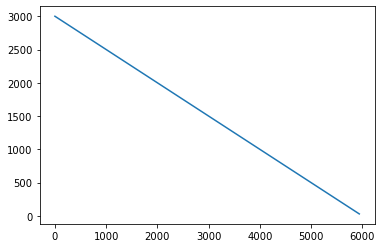

In [51]:
linear_cooling1 = np.linspace(3000,30,(3000-30)*2)
linear_cooling2 = np.linspace(3000,10,(3000-10)*2)
plt.plot(linear_cooling1)
initial = np.array([400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0])

In [52]:
import numba

def SA(solution,evaluation,delta,boundary,cooling_schedule):
    """ Simulated Annealing for minimization
    solution: np.array. Initial guess of solution
    evaluation: func. Function to evaluate solution
    delta: float. Magnitude of random displacement
    boundary: array of int/float. [lowerbound,upperbound]
    cooling_schedule: np.array. An array of tempretures for simulated annealing
    """
    best_solution=solution.copy()
    lowest_eval=evaluation(best_solution)
    for idx,temp in enumerate(cooling_schedule):
        if idx%500==0:
            print("%d/%d   temp:%f"%(idx,len(cooling_schedule),temp))
        for n in range(len(solution)):
            trial=solution.copy()
            trial[n]+=delta*(2*np.random.random()-1)
            if trial[n]>=boundary[0] and trial[n]<=boundary[1]:
                if np.exp(-(evaluation(trial)-evaluation(solution))/temp)>np.random.random():
                    solution=trial
                    if evaluation(solution)<lowest_eval:
                        best_solution=solution.copy()
                        lowest_eval=evaluation(best_solution)
    return {"solution":best_solution,"evaluation":lowest_eval}


SA(initial,Schwefel,0.5,[-500.0,500.0],linear_cooling2)






0/5980   temp:3000.000000
500/5980   temp:2749.958187
1000/5980   temp:2499.916374
1500/5980   temp:2249.874561
2000/5980   temp:1999.832748
2500/5980   temp:1749.790935
3000/5980   temp:1499.749122
3500/5980   temp:1249.707309
4000/5980   temp:999.665496
4500/5980   temp:749.623683
5000/5980   temp:499.581870
5500/5980   temp:249.540057


{'solution': array([409.92200032, 422.89364451, 412.03130478, 400.89365856,
        382.27468065, 418.95898455, 433.01440276, 405.33740188,
        410.30543057, 418.43413549]),
 'evaluation': 311.23619487956466}

### Results of cooling to 30k:
 {'solution': array([401.95961952, 401.73384909, 399.77923077, 402.58062509,
         398.20568883, 393.69259645, 400.08385456, 406.5751065 ,
        401.87068183, 402.32257805]),
 'evaluation': 505.67854948603235}
 
 {'solution': array([398.19367804, 402.71537622, 402.29245314, 402.09846683,
        398.84873886, 401.88885117, 402.03392677, 398.02615728,
        403.84803147, 398.99766267]),
 'evaluation': 498.6607704304565}

 {'solution': array([396.24683702, 400.94075755, 399.68220039, 402.45384345,
        403.36741374, 400.48218127, 401.13933858, 406.12415339,
        398.05183186, 402.20182853]),
 'evaluation': 493.31579366268033}

### Results of cooling to 10k:
 {'solution': array([404.39670429, 408.51932237, 401.29860695, 403.90097084,
        405.86960325, 406.9867223 , 406.0797239 , 421.91470371,
        402.7028205 , 386.90141679]),
 'evaluation': 394.0468481978796}

 {'solution': array([408.2951065 , 404.35795534, 399.38883255, 396.48701909,
        398.33884911, 393.40359247, 404.03689135, 413.38134821,
        401.78260699, 399.87631444]),
 'evaluation': 479.54843193471834}
 
 {'solution': array([397.0983453 , 414.14925898, 407.01958924, 401.77358943,
        404.63403286, 410.46927417, 406.78679262, 395.03358842,
        400.42851645, 419.5898875 ]),
 'evaluation': 349.32836491771513}

 
##### On average, better solutions are obtained from cooling to a lower temperature



## Question 1 Part b

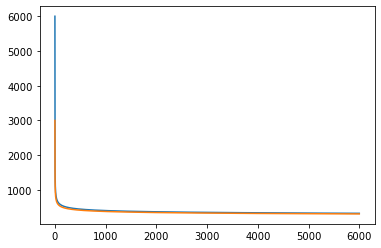

In [53]:
logarithmic_cooling1 = np.array([])
for i in range(6001):
    logarithmic_cooling1 = np.append(logarithmic_cooling1,(6000/(1+ 6000*np.log(1+i)/3000)))
plt.plot(logarithmic_cooling1)

logarithmic_cooling2 = np.array([])
for i in range(6001):
    logarithmic_cooling2 = np.append(logarithmic_cooling2,(3000/(1+ 3000*np.log(1+i)/3000)))
plt.plot(logarithmic_cooling2)

In [54]:
def SA(solution,evaluation,delta,boundary,cooling_schedule):
    """ Simulated Annealing for minimization
    solution: np.array. Initial guess of solution
    evaluation: func. Function to evaluate solution
    delta: float. Magnitude of random displacement
    boundary: array of int/float. [lowerbound,upperbound]
    cooling_schedule: np.array. An array of tempretures for simulated annealing
    """
    best_solution=solution.copy()
    lowest_eval=evaluation(best_solution)
    for idx,temp in enumerate(cooling_schedule):
        if idx%500==0:
            print("%d/%d   temp:%f"%(idx,len(cooling_schedule),temp))
        for n in range(len(solution)):
            trial=solution.copy()
            trial[n]+=delta*(2*np.random.random()-1)
            if trial[n]>=boundary[0] and trial[n]<=boundary[1]:
                if np.exp(-(evaluation(trial)-evaluation(solution))/temp)>np.random.random():
                    solution=trial
                    if evaluation(solution)<lowest_eval:
                        best_solution=solution.copy()
                        lowest_eval=evaluation(best_solution)
    return {"solution":best_solution,"evaluation":lowest_eval}


SA(initial,Schwefel,0.5,[-500.0,500.0],logarithmic_cooling2)

0/6001   temp:3000.000000
500/6001   temp:415.707877
1000/6001   temp:379.326466
1500/6001   temp:360.842054
2000/6001   temp:348.780336
2500/6001   temp:339.964687
3000/6001   temp:333.085339
3500/6001   temp:327.482176
4000/6001   temp:322.778491
4500/6001   temp:318.740173
5000/6001   temp:315.212364
5500/6001   temp:312.087616
6000/6001   temp:309.288509


{'solution': array([404.11095893, 405.57347469, 405.30179787, 393.69514849,
        405.26888806, 405.88541661, 414.58332046, 415.12101214,
        407.57774999, 385.68359892]),
 'evaluation': 419.93072065387514}

### Results with initial temperature of 6000k:
{'solution': array([410.65174856, 420.33424829, 408.16342106, 401.01755326,
        410.41874023, 402.57349059, 394.80321195, 412.00031086,
        410.30582654, 396.97093843]),
 'evaluation': 314.9030902553077}

 {'solution': array([411.09118894, 408.84039108, 406.73419803, 411.74630376,
        426.98342836, 394.49921394, 414.99659845, 411.67969076,
        406.67299525, 410.72714753]),
 'evaluation': 209.09523720553761}

 {'solution': array([420.97139186, 420.74145283, 402.71537012, 385.74316384,
        417.33904163, 399.84789883, 396.19735922, 412.76173187,
        412.8566653 , 399.20549608]),
 'evaluation': 390.86217888393}
 
### Results with intial temperature of 3000k:
{'solution': array([390.00344074, 421.15700647, 433.5379708 , 423.67024766,
        411.19886594, 420.54256908, 420.85926799, 429.27645829,
        405.86011888, 416.62559737]),
 'evaluation': 185.8894200003233}

 {'solution': array([403.97662781, 408.95918128, 397.16082029, 411.08906659,
        406.05990034, 394.39803512, 405.1748975 , 412.61899037,
        410.43166142, 403.43692085]),
 'evaluation': 338.6942017456463}

 {'solution': array([408.06924782, 428.46455521, 400.68681417, 383.74369953,
        396.03608294, 415.37470597, 409.79720893, 415.18983855,
        419.55647374, 409.37347281]),
 'evaluation': 354.48627510371716}

##### On average, both logarithmic cooling schedules lead to better solutions than linear cooling

## Question 1 Part c

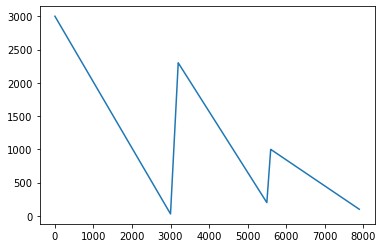

In [55]:
linear_cooling1 = np.linspace(3000,30,3000)
heating=np.append(linear_cooling1,np.linspace(linear_cooling1[-1],2300,200))
heating=np.append(heating,np.linspace(heating[-1],200,2300))
heating=np.append(heating,np.linspace(heating[-1],1000,100))
schedule=np.append(heating,np.linspace(heating[-1],100,2300))
plt.figure()
plt.plot(schedule)

In [56]:
def SA(solution,evaluation,delta,boundary,cooling_schedule):
    """ Simulated Annealing for minimization
    solution: np.array. Initial guess of solution
    evaluation: func. Function to evaluate solution
    delta: float. Magnitude of random displacement
    boundary: array of int/float. [lowerbound,upperbound]
    cooling_schedule: np.array. An array of tempretures for simulated annealing
    """
    best_solution=solution.copy()
    lowest_eval=evaluation(best_solution)
    for idx,temp in enumerate(cooling_schedule):
        if idx%500==0:
            print("%d/%d   temp:%f"%(idx,len(cooling_schedule),temp))
        for n in range(len(solution)):
            trial=solution.copy()
            trial[n]+=delta*(2*np.random.random()-1)
            if trial[n]>=boundary[0] and trial[n]<=boundary[1]:
                if np.exp(-(evaluation(trial)-evaluation(solution))/temp)>np.random.random():
                    solution=trial
                    if evaluation(solution)<lowest_eval:
                        best_solution=solution.copy()
                        lowest_eval=evaluation(best_solution)
    return {"solution":best_solution,"evaluation":lowest_eval}


SA(initial,Schwefel,0.5,[-500.0,500.0],heating)

0/5600   temp:3000.000000
500/5600   temp:2504.834945
1000/5600   temp:2009.669890
1500/5600   temp:1514.504835
2000/5600   temp:1019.339780
2500/5600   temp:524.174725
3000/5600   temp:30.000000
3500/5600   temp:2025.967812
4000/5600   temp:1569.247499
4500/5600   temp:1112.527186
5000/5600   temp:655.806873
5500/5600   temp:200.000000


{'solution': array([421.71141513, 418.36476996, 380.60976251, 415.66529137,
        417.95774491, 401.57406357, 409.00766093, 422.72338768,
        420.97440962, 388.2584955 ]),
 'evaluation': 381.8520533628648}

### Results of heating and cooling schedule:
{'solution': array([410.26658686, 399.30241289, 404.27520702, 412.39865061,
        399.96141002, 408.58010571, 389.16993348, 413.53807862,
        405.91184769, 386.68723041]),
 'evaluation': 480.66399341508395}
 
 {'solution': array([399.0088453 , 408.13542331, 403.00331785, 391.27241485,
        404.3833026 , 397.61922611, 406.28683651, 399.35870841,
        403.35910734, 401.22351143]),
 'evaluation': 494.43808579542656}

{'solution': array([402.73716751, 408.80072617, 400.08274249, 400.14761476,
        395.83010505, 405.28408989, 392.72808628, 407.60438496,
        397.01760472, 403.67275408]),
 'evaluation': 497.0578001261583}

#### This cooling and heating schedule seems to be doing worse than both linear and logarithmic cooling schedules for this particular funciton and set of hyperparameters.

## Question 2 Part a

In [57]:
import pandas as pd


df=pd.read_csv('~/Downloads/wines.csv')
df

,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,1
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1
2,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1,1
3,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280,1,1
4,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.50,0.67,1.92,630,3,3
174,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3,3
175,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3,3
176,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.20,0.61,1.60,560,3,3


In [58]:
def normalise(df):
    df_n = df.drop(columns = ["Start assignment","ranking"])
    df_n = (df_n - df_n.mean())/df_n.std()
    df_n = df_n.join(df["Start assignment"])
    df_n = df_n.join(df["ranking"])
    return df_n
df_n = normalise(df)
df_n


,Alcohol %,Malic Acid,Ash,Alkalinity,Mg,Phenols,Flavanoids,Phenols.1,Proantho-cyanins,Color intensity,Hue,OD280 315,Proline,Start assignment,ranking
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159,1,1
1,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767,1,1
2,2.253415,-0.623328,-0.716315,-1.645408,-0.191954,0.806722,0.951817,-0.577356,0.679820,0.061213,0.536158,0.335659,0.946649,1,1
3,1.378844,-0.766550,-0.169557,-0.806975,-0.331985,-0.151973,0.401188,-0.818411,-0.036514,-0.025057,0.929908,0.293405,1.692900,1,1
4,0.923081,-0.542765,0.158499,-1.046527,-0.752080,0.487157,0.731565,-0.577356,0.382804,0.233755,0.842408,0.406082,1.819921,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.491955,2.026281,1.798775,1.648436,0.858284,-0.503494,-1.070491,-0.738059,-0.840205,1.484679,-1.257591,-0.974218,-0.371199,3,3
174,0.331822,1.739837,-0.388260,0.151234,1.418411,-1.126646,-1.340800,0.547563,-0.420888,2.217979,-1.607590,-1.481267,0.279786,3,3
175,0.208643,0.227053,0.012696,0.151234,1.418411,-1.030776,-1.350811,1.351077,-0.228701,1.829761,-1.563840,-1.396759,0.295664,3,3
176,1.391162,1.578712,1.361368,1.498716,-0.261969,-0.391646,-1.270720,1.592131,-0.420888,1.786626,-1.520090,-1.424928,-0.593486,3,3


## Question 2 Part b

In [59]:
df_n1 = df_n.loc[df["Start assignment"] == 1]
df_n2 = df_n.loc[df["Start assignment"] == 2]
df_n3 = df_n.loc[df["Start assignment"] == 3]
centroid1 = df_n1.drop(columns = ["Start assignment","ranking"]).mean()
centroid2 = df_n1.drop(columns = ["Start assignment","ranking"]).mean()
centroid3 = df_n1.drop(columns = ["Start assignment","ranking"]).mean()
print(centroid1, centroid2, centroid3)

Alcohol %          -0.026247
Malic Acid         -0.022814
Ash                 0.039092
Alkalinity         -0.011393
Mg                  0.001194
Phenols             0.046102
Flavanoids         -0.014459
Phenols.1          -0.092477
Proantho-cyanins    0.015299
Color intensity    -0.122335
Hue                 0.071956
OD280 315          -0.021072
Proline            -0.001085
dtype: float64 Alcohol %          -0.026247
Malic Acid         -0.022814
Ash                 0.039092
Alkalinity         -0.011393
Mg                  0.001194
Phenols             0.046102
Flavanoids         -0.014459
Phenols.1          -0.092477
Proantho-cyanins    0.015299
Color intensity    -0.122335
Hue                 0.071956
OD280 315          -0.021072
Proline            -0.001085
dtype: float64 Alcohol %          -0.026247
Malic Acid         -0.022814
Ash                 0.039092
Alkalinity         -0.011393
Mg                  0.001194
Phenols             0.046102
Flavanoids         -0.014459
Phenols.1    

## Question 2 Part c

In [60]:
def cost(rankings):
    df_n['trial'] = rankings.tolist()
    df_n1 = df_n.loc[df_n["trial"] == 1]
    df_n2 = df_n.loc[df_n["trial"] == 2]
    df_n3 = df_n.loc[df_n["trial"] == 3]
    centroid1 = df_n1.drop(columns = ["Start assignment","ranking", "trial"]).mean()
    centroid2 = df_n1.drop(columns = ["Start assignment","ranking", "trial"]).mean()
    centroid3 = df_n1.drop(columns = ["Start assignment","ranking", "trial"]).mean()
    d1 = np.square((df_n1 - centroid1).drop(columns = ["Start assignment", "ranking", "trial"]))
    d2 = np.square((df_n2 - centroid2).drop(columns = ["Start assignment", "ranking", "trial"]))
    d3 = np.square((df_n3 - centroid3).drop(columns = ["Start assignment", "ranking", "trial"]))
    return d1.sum().sum() + d2.sum().sum() + d3.sum().sum()
J = cost(df['Start assignment'].to_numpy())
J


2307.1548828673654

## Question 2 Part d

In [61]:
@numba.jit
def simulated_annealing(feats,ranks,centers,start_temp,alpha,steps=10000):
    """ Simulated Annealing for clustering
    feats: pd.DataFrame. Normalized chemical descriptors
    ranks: np.array shape(178,). Initial assignment.
    centers: np.array shape (3,13). Fixed centers
    start_temp: float. Initial tempreture
    alpha: float. Hyperparameter for geometric cooling
    steps: int. 
    """
    best_rank=ranks.copy()
    # Use your cost function to evaluate the current best rank
    new_eval = lowest_eval = cost(ranks)
    for step in (range(steps)):
        # update tempture according to geometric cooling schedule
        temp = (alpha**step)*start_temp
        if step == steps-1:
            print('Final temperature:', temp)
        if step%500==0:
            print(step,temp,lowest_eval)
        for n in range(len(ranks)):
            trial=ranks.copy()
            rand_choice=np.random.randint(3)+1
            trial[n]=rand_choice
            trialcost = cost(trial)
            # How much does the cost function of trial and cost function of ranks differ?
            diff = new_eval - trialcost
            # Metropolis acceptance criterion
            if np.exp(-diff/temp)>=np.random.random():
                ranks=trial
                # update evaluation
                new_eval = trialcost
                if new_eval<lowest_eval:
                    #update best rank and lowest_eval
                    best_rank = trial.copy()
                    lowest_eval = new_eval
    return best_rank, lowest_eval
solution, lowest_eval = simulated_annealing(df_n, df['Start assignment'].to_numpy(), np.array([centroid1, centroid2, centroid3]),500,0.999,steps=5000)

0 500.0 2307.1548828673654
500 303.18947243059233 2301.946531099956
1000 183.84771238548186 2301.946531099956
1500 111.48138185145105 2301.946531099956
2000 67.59996269874972 2301.946531099956
2500 40.9911940539233 2301.946531099956
3000 24.85619699901808 2301.946531099956
3500 15.07227450952633 2301.946531099956
4000 9.139509913744707 2301.946531099956
4500 5.542006378044853 2301.946531099956
Final temperature: 3.3639198998326267


In [71]:
solutiony, lowest_evaly = simulated_annealing(df_n, df['Start assignment'].to_numpy(), np.array([centroid1, centroid2, centroid3]),500,0.999,steps=5000)
solutionz, lowest_evalz = simulated_annealing(df_n, df['Start assignment'].to_numpy(), np.array([centroid1, centroid2, centroid3]),500,0.999,steps=5000)

0 500.0 2307.1548828673654
500 303.18947243059233 2303.032508028119
1000 183.84771238548186 2302.3912000539167
1500 111.48138185145105 2302.3912000539167
2000 67.59996269874972 2302.3912000539167
2500 40.9911940539233 2302.2591724210874
3000 24.85619699901808 2302.2591724210874
3500 15.07227450952633 2302.2591724210874
4000 9.139509913744707 2302.2591724210874
4500 5.542006378044853 2302.2591724210874
Final temperature: 3.3639198998326267
0 500.0 2307.1548828673654
500 303.18947243059233 2302.473446221185
1000 183.84771238548186 2302.227787973779
1500 111.48138185145105 2302.227787973779
2000 67.59996269874972 2302.227787973779
2500 40.9911940539233 2302.227787973779
3000 24.85619699901808 2302.227787973779
3500 15.07227450952633 2302.227787973779
4000 9.139509913744707 2302.227787973779
4500 5.542006378044853 2302.227787973779
Final temperature: 3.3639198998326267


To validate how good is your solution

In [72]:
def validate(solution,df):
    """Prints out how many wines are corretly assigned to its cultivar
    solution: np.array shape(178,). Your solution.
    df: pd.DataFrame. Read-in of the wines.csv dataset
    """
    # correct classification
    ranking = df['ranking'].values
    cluster_1 = list(df[df['ranking']==1].index)
    cluster_2 = list(df[df['ranking']==2].index)
    cluster_3 = list(df[df['ranking']==3].index)
    clusters =[cluster_1,cluster_2,cluster_3]

    for i in range(3):
        scores=[]
        for j in range(1,4):
            sol_j= [idx for idx,k in enumerate(solution) if k==j]
            scores.append(len(np.intersect1d(sol_j, clusters[i])))

        print(f'Class {i+1} - cultivar {np.argmax(scores)+1}: {np.max(scores)} out \
of {len(clusters[np.argmax(scores)])} are classified correctly')

validate(solution, df)
validate(solutiony, df)
validate(solutionz, df)

Class 1 - cultivar 2: 22 out of 71 are classified correctly
Class 2 - cultivar 3: 25 out of 48 are classified correctly
Class 3 - cultivar 2: 19 out of 71 are classified correctly
Class 1 - cultivar 1: 21 out of 59 are classified correctly
Class 2 - cultivar 1: 27 out of 59 are classified correctly
Class 3 - cultivar 3: 22 out of 48 are classified correctly
Class 1 - cultivar 2: 22 out of 71 are classified correctly
Class 2 - cultivar 1: 28 out of 59 are classified correctly
Class 3 - cultivar 1: 18 out of 59 are classified correctly


The algorithm did not seem to do better than randomly assigning each wine to a cluster

## Qestion 2 Part e

In [73]:
def assign_ranks(feats,centers):
    """
    feats: pd.DataFrame. Normalized chemical descriptors
    centers: np.array shape (3,13). Position of centers
    """
    result=np.zeros(len(feats))
    for i in range(len(feats)):
        dist=np.zeros(3)
        for j in [0,1,2]:
            dist[j]=np.sum((feats[i] -centers[j,:])**2)
        result[i]=np.argmin(dist)+1
    return result

In [74]:
@numba.jit
def simulated_annealing_2(feats,ranks,centers,delta,start_temp,alpha,steps=10000):
    """ Simulated Annealing for clustering
    feats: pd.DataFrame. Normalized chemical descriptors
    ranks: np.array shape(178,). Initial assignment.
    centers: np.array shape (3,13). Fixed centers
    start_temp: float. Initial tempreture
    alpha: float. Hyperparameter for geometric cooling
    steps: int. 
    """
    ranks=np.array(ranks,dtype=int)
    best_center=centers.copy()
    best_rank=ranks.copy()
    # Use your cost function to evaluate the current best rank
    lowest_eval = cost(ranks)
    for step in (range(steps)):
        # update tempture according to geometric cooling schedule
        temp = (alpha**step)*start_temp
        if step%500==0:
            print(step,temp,lowest_eval)
        for n in range(len(ranks)):
            trial_center=centers.copy()
            for i in range(len(trial_center)):
                trial_center[i,:]+=delta*(2*np.random.random(trial_center.shape[1])-1)
            trial_ranks = assign_ranks(feats.drop(columns = ["Start assignment", "ranking", "trial"]).to_numpy(),trial_center)
            new_eval = cost(trial_ranks)
            diff = lowest_eval - new_eval
            # Fill in Metropolis acceptance criterion
            if np.exp(-diff/temp)>=np.random.random():
                ranks=trial_ranks
                centers=trial_center
                # update evaluation
                if new_eval<lowest_eval:
                    best_center=centers.copy()
                    best_rank=ranks.copy()
                    lowest_eval=new_eval
    return best_rank, best_center, lowest_eval
solution2x, centers2x,lowest_eval2x = simulated_annealing_2(df_n, df['Start assignment'].to_numpy(), np.array([centroid1, centroid2, centroid3]),0.01,500,0.999,steps=5000)
solution2y, centers2y,lowest_eval2y = simulated_annealing_2(df_n, df['Start assignment'].to_numpy(), np.array([centroid1, centroid2, centroid3]),0.01,500,0.999,steps=5000)
solution2z, centers2z,lowest_eval2z = simulated_annealing_2(df_n, df['Start assignment'].to_numpy(), np.array([centroid1, centroid2, centroid3]),0.01,500,0.999,steps=5000)

validate(solution2x, df)
validate(solution2y, df)
validate(solution2z, df)

0 500.0 2307.1548828673654
500 303.18947243059233 2307.1548828673654
1000 183.84771238548186 2303.948207163066
1500 111.48138185145105 2303.948207163066
2000 67.59996269874972 2302.7334376998274
2500 40.9911940539233 2301.0
3000 24.85619699901808 2301.0
3500 15.07227450952633 2301.0
4000 9.139509913744707 2301.0
4500 5.542006378044853 2301.0
0 500.0 2307.1548828673654
500 303.18947243059233 2307.1548828673654
1000 183.84771238548186 2307.1548828673654
1500 111.48138185145105 2307.1548828673654
2000 67.59996269874972 2307.1548828673654
2500 40.9911940539233 2307.1548828673654
3000 24.85619699901808 2307.1548828673654
3500 15.07227450952633 2307.1548828673654
4000 9.139509913744707 2301.0
4500 5.542006378044853 2301.0
0 500.0 2307.1548828673654
500 303.18947243059233 2307.1548828673654
1000 183.84771238548186 2307.1548828673654
1500 111.48138185145105 2307.1548828673654
2000 67.59996269874972 2307.1548828673654
2500 40.9911940539233 2307.1548828673654
3000 24.85619699901808 2307.15488286

## Results over the three trials

0 500.0 2307.1548828673654
500 303.18947243059233 2307.1548828673654
1000 183.84771238548186 2303.948207163066
1500 111.48138185145105 2303.948207163066
2000 67.59996269874972 2302.7334376998274
2500 40.9911940539233 2301.0
3000 24.85619699901808 2301.0
3500 15.07227450952633 2301.0
4000 9.139509913744707 2301.0
4500 5.542006378044853 2301.0
0 500.0 2307.1548828673654
500 303.18947243059233 2307.1548828673654
1000 183.84771238548186 2307.1548828673654
1500 111.48138185145105 2307.1548828673654
2000 67.59996269874972 2307.1548828673654
2500 40.9911940539233 2307.1548828673654
3000 24.85619699901808 2307.1548828673654
3500 15.07227450952633 2307.1548828673654
4000 9.139509913744707 2301.0
4500 5.542006378044853 2301.0
0 500.0 2307.1548828673654
500 303.18947243059233 2307.1548828673654
1000 183.84771238548186 2307.1548828673654
1500 111.48138185145105 2307.1548828673654
2000 67.59996269874972 2307.1548828673654
2500 40.9911940539233 2307.1548828673654
3000 24.85619699901808 2307.1548828673654
3500 15.07227450952633 2301.1317660958575
4000 9.139509913744707 2301.0
4500 5.542006378044853 2301.0
Class 1 - cultivar 1: 59 out of 59 are classified correctly
Class 2 - cultivar 1: 71 out of 59 are classified correctly
Class 3 - cultivar 1: 48 out of 59 are classified correctly
Class 1 - cultivar 1: 59 out of 59 are classified correctly
Class 2 - cultivar 1: 71 out of 59 are classified correctly
Class 3 - cultivar 1: 48 out of 59 are classified correctly
Class 1 - cultivar 1: 59 out of 59 are classified correctly
Class 2 - cultivar 1: 71 out of 59 are classified correctly
Class 3 - cultivar 1: 48 out of 59 are classified correctly

This algorithm did significantly better than the previous one and yielded about an 88% accuracy